In [1]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install mdatagen
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install numpy scipy sklearn
!pip install jax
!pip install chex
!pip install attr
!pip install optax



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss

import ot

import os
import pickle as pkl
import copy

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from utils import *
from SoftImpute import softimpute, cv_softimpute
#from DataSetLoader import dataset_loader, ground_truth
from SinkhornImputation import SinkhornImputation
from Sinkhorn_CMI import *
from RR_imputer import RRimputer
import matplotlib.pyplot as plt
from CMI import *

from Inject_Missing_Values import *

from Miss import *

import argparse
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")
import pandas as pd

torch.set_default_tensor_type('torch.DoubleTensor')

c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


**Load Data**

In [3]:
import pandas as pd

# Read CSV file into a Pandas DataFrame
groundTruth = pd.read_csv(r'Data\Student_performance_data _.csv', delimiter=',', header=0)

# Store feature columns in a DataFrame


X= groundTruth.iloc[:, :-1]  # Selects all rows and all columns except the last one
Y = groundTruth.iloc[:, -1]  # Selects all rows and only the last column


In [4]:
print(groundTruth)

      Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0      17       1          0                  2        19.833723         7   
1      18       0          0                  1        15.408756         0   
2      15       0          2                  3         4.210570        26   
3      17       1          0                  3        10.028829        14   
4      17       1          0                  2         4.672495        17   
...   ...     ...        ...                ...              ...       ...   
2387   18       1          0                  3        10.680555         2   
2388   17       0          0                  1         7.583217         4   
2389   16       1          0                  2         6.805500        20   
2390   16       1          1                  0        12.416653        17   
2391   16       1          0                  2        17.819907        13   

      Tutoring  ParentalSupport  Extracurricular  Sports  Music

In [5]:
groundTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 261.8 KB


In [9]:
print(groundTruth['Age'].unique())
print(groundTruth['Gender'].unique())
print(groundTruth['Ethnicity'].unique())
print(groundTruth['ParentalEducation'].unique())
print(groundTruth['StudyTimeWeekly'].unique())
print(groundTruth['Absences'].unique())
print(groundTruth['Tutoring'].unique())
print(groundTruth['ParentalSupport'].unique())
print(groundTruth['Extracurricular'].unique())
print(groundTruth['Sports'].unique())
print(groundTruth['Music'].unique())
print(groundTruth['Volunteering'].unique())
print(groundTruth['GPA'].unique())
print(groundTruth['GradeClass'].unique())

[17 18 15 16]
[1 0]
[0 2 1 3]
[2 1 3 4 0]
[19.83372281 15.40875606  4.21056977 ...  6.80549964 12.41665266
 17.81990749]
[ 7  0 26 14 17 10 22  1 11 15 21  9 16 29  2 25 20  5  8 12 27 23  3 13
  6 28  4 18 19 24]
[1 0]
[2 1 3 4 0]
[0 1]
[0 1]
[1 0]
[0 1]
[2.92919559 3.04291483 0.11260225 ... 1.14233288 1.80329676 2.14001388]
[2 1 4 3 0]


In [10]:
groundTruth_tensor = torch.tensor(scale(groundTruth)) #converting groundTruth to Tensor, z-score scaling

In [11]:
bucket_specs = {
     
    0: 4,   # age (4 bins)
    1: 2,  # gender (2 bins)
    2: 4,  # ethinicity  
    13: 5,   # grade_class
    4: 5,  # studytime weekly
    5: 5, #absances
    6: 2,
    7: 5,
    8: 2


}

# Define multiple attributes for X, Y, Z
X_cols = [0,1,2]  # Bucketized sensitive attributes (e.g., sex, race, age)
Y_cols = [13]     # Bucketized outcome-related attributes
Z_cols = [4,5,6,7,8]  

**CMI for GroundTruth**

In [12]:
cmi_groundTruth = CMI.conditional_mutual_information(groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_groundTruth)

0.6519401669502258


MCAR 30%

In [13]:
generator = Inject_Missing_Values()
miss_mcar30,index_mcar30 = generator.MCAR(X,missing_rate=30)
type(miss_mcar30)
miss_mcar30 = pd.concat([miss_mcar30, Y], axis=1) #adding the target coloumn

In [14]:
miss_mcar30_numpy = scale(miss_mcar30) #z-score scaling
miss_mcar30_tensor = torch.tensor(miss_mcar30_numpy) #converting to tensor

In [15]:
#only Sinkhorn
n_mcar30, d_mcar30 = miss_mcar30_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar30 = pick_epsilon(miss_mcar30_tensor)
print(epsilon_mcar30)
mask_mcar30= torch.isnan(miss_mcar30_tensor).double()


on_sk_imputer_mcar30 = SinkhornImputation(eps=epsilon_mcar30, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mcar30, on_sk_maes30mcar, on_sk_rmses30mcar = on_sk_imputer_mcar30.fit_transform(miss_mcar30_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mcar30_numpy = on_sk_imp_mcar30.detach().cpu().numpy()
on_sk_mae_mcar30 = MAE(on_sk_imp_mcar30,groundTruth_tensor , mask_mcar30)
on_sk_rmse_mcar30 = RMSE(on_sk_imp_mcar30, groundTruth_tensor, mask_mcar30)
print(on_sk_mae_mcar30,on_sk_rmse_mcar30)

0.47742280953915817


INFO:root:batchsize = 128, epsilon = 0.4774
INFO:root:Iteration 0:	 Loss: 3.1335	 Validation MAE: 0.8663	RMSE: 1.0056
INFO:root:Iteration 50:	 Loss: 2.9639	 Validation MAE: 0.8225	RMSE: 0.9963
INFO:root:Iteration 100:	 Loss: 2.9972	 Validation MAE: 0.8026	RMSE: 0.9929
INFO:root:Iteration 150:	 Loss: 3.1475	 Validation MAE: 0.7880	RMSE: 0.9899
INFO:root:Iteration 200:	 Loss: 2.8430	 Validation MAE: 0.7780	RMSE: 0.9885
INFO:root:Iteration 250:	 Loss: 2.8374	 Validation MAE: 0.7689	RMSE: 0.9868
INFO:root:Iteration 300:	 Loss: 3.0002	 Validation MAE: 0.7609	RMSE: 0.9853
INFO:root:Iteration 350:	 Loss: 2.9647	 Validation MAE: 0.7547	RMSE: 0.9852
INFO:root:Iteration 400:	 Loss: 2.8480	 Validation MAE: 0.7485	RMSE: 0.9844
INFO:root:Iteration 450:	 Loss: 2.9086	 Validation MAE: 0.7454	RMSE: 0.9847
INFO:root:Iteration 500:	 Loss: 2.8421	 Validation MAE: 0.7419	RMSE: 0.9846
INFO:root:Iteration 550:	 Loss: 3.2971	 Validation MAE: 0.7385	RMSE: 0.9847
INFO:root:Iteration 600:	 Loss: 3.0685	 Validat

tensor(0.7298, grad_fn=<DivBackward0>) tensor(1.0059, grad_fn=<SqrtBackward0>)


CMI only for Sinkhorn Imputation

In [16]:
#only CMI
on_cmi_missmcar30 = CMI.conditional_mutual_information(on_sk_imp_mcar30, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmcar30)
print(on_sk_mae_mcar30,on_sk_rmse_mcar30)

0.5927477478981018
tensor(0.7298, grad_fn=<DivBackward0>) tensor(1.0059, grad_fn=<SqrtBackward0>)


In [17]:
#sinkhorn_CMI
n_mcar30, d_mcar30 = miss_mcar30_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar30 = pick_epsilon(miss_mcar30_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mcar30)
mask_mcar30= torch.isnan(miss_mcar30_tensor).double()


sk_imputer_mcar30 = SinkhornImputation_CMI(eps=epsilon_mcar30, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar30, sk_maes30mcar, sk_rmses30mcar,cmi_loss = sk_imputer_mcar30.fit_transform(miss_mcar30_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mcar30_numpy = sk_imp_mcar30.detach().cpu().numpy()

sk_mae_mcar30 = MAE(sk_imp_mcar30,groundTruth_tensor , mask_mcar30)
sk_rmse_mcar30 = RMSE(sk_imp_mcar30, groundTruth_tensor, mask_mcar30)
print(sk_mae_mcar30,sk_rmse_mcar30)





0.4828995545170667


INFO:root:Iteration 0:	 Loss: 3.2560	 Validation MAE: 0.8676	RMSE: 1.0057
INFO:root:Iteration 50:	 Loss: 3.6644	 Validation MAE: 0.8224	RMSE: 0.9959
INFO:root:Iteration 100:	 Loss: 3.9335	 Validation MAE: 0.8000	RMSE: 0.9908
INFO:root:Iteration 150:	 Loss: 4.0131	 Validation MAE: 0.7850	RMSE: 0.9872
INFO:root:Iteration 200:	 Loss: 4.5557	 Validation MAE: 0.7736	RMSE: 0.9848
INFO:root:Iteration 250:	 Loss: 4.6442	 Validation MAE: 0.7649	RMSE: 0.9842
INFO:root:Iteration 300:	 Loss: 5.0698	 Validation MAE: 0.7575	RMSE: 0.9835
INFO:root:Iteration 350:	 Loss: 5.1480	 Validation MAE: 0.7523	RMSE: 0.9838
INFO:root:Iteration 400:	 Loss: 5.5014	 Validation MAE: 0.7470	RMSE: 0.9841
INFO:root:Iteration 450:	 Loss: 6.0196	 Validation MAE: 0.7434	RMSE: 0.9843
INFO:root:Iteration 500:	 Loss: 6.0172	 Validation MAE: 0.7402	RMSE: 0.9855
INFO:root:Iteration 550:	 Loss: 5.9829	 Validation MAE: 0.7365	RMSE: 0.9851
INFO:root:Iteration 600:	 Loss: 6.6632	 Validation MAE: 0.7337	RMSE: 0.9860
INFO:root:Itera

tensor(0.7283, grad_fn=<DivBackward0>) tensor(1.0046, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [24]:
#CMI
cmi_mcar30 = CMI.conditional_mutual_information(sk_imp_mcar30, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mcar30)
print(sk_mae_mcar30,sk_rmse_mcar30)

0.5814964175224304
tensor(0.7283, grad_fn=<DivBackward0>) tensor(1.0046, grad_fn=<SqrtBackward0>)


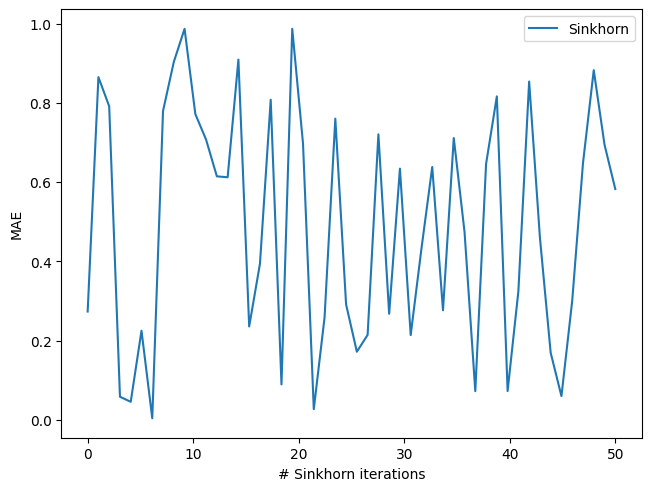

In [30]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes30mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes30mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')
ax.set_ylabel('MAE')
plt.legend()
plt.show()

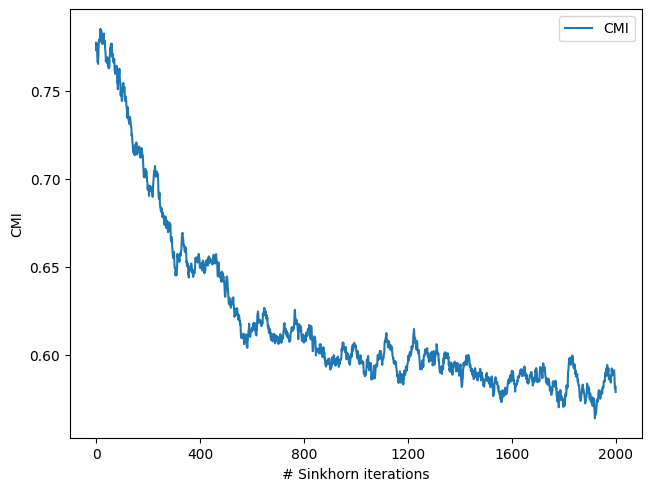

In [20]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(cmi_loss)

ax.plot(np.linspace(0, 1, npoints) * npoints, cmi_loss, label='CMI')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('CMI')
plt.legend()
plt.show()

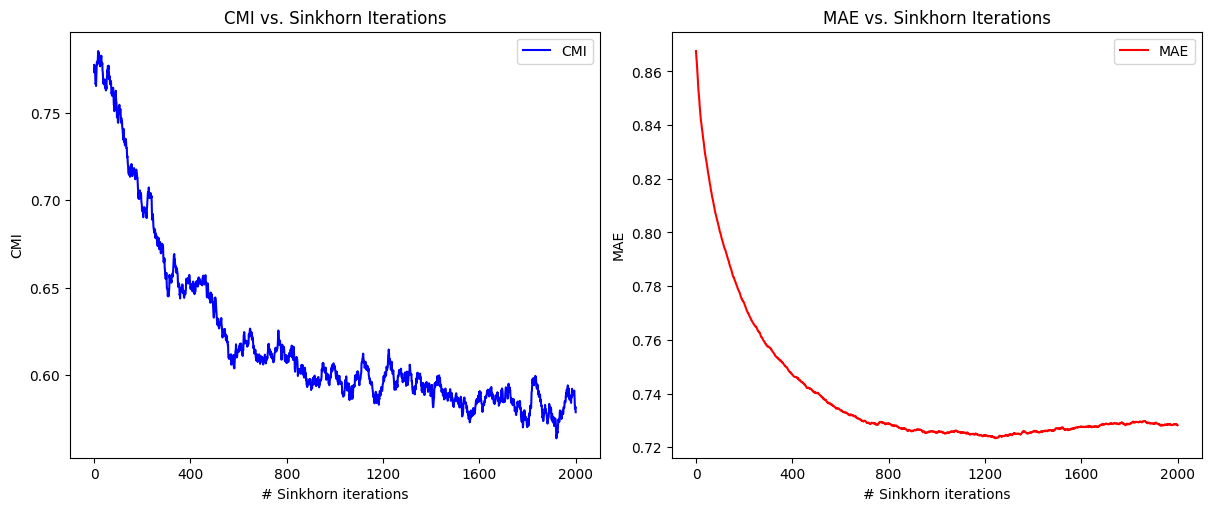

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss)  # Length of CMI data
npoints_mae = len(sk_maes30mcar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes30mcar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


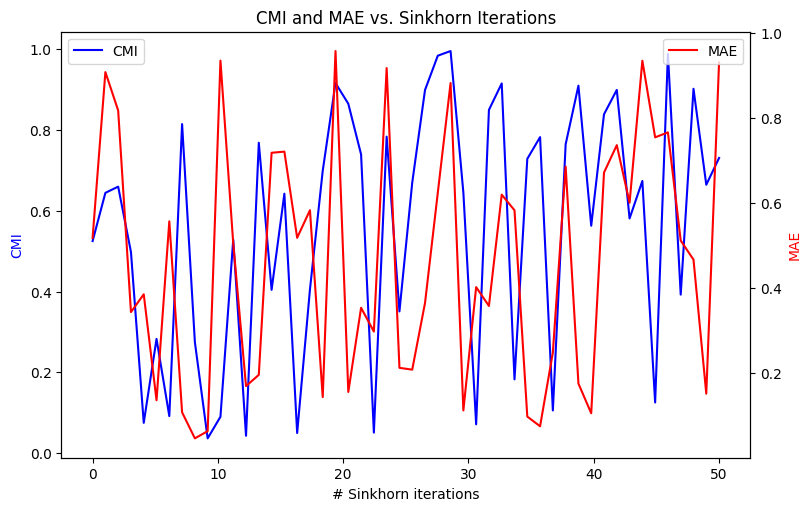

In [31]:
# Re-import necessary libraries after execution state reset
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
cmi_loss = np.random.rand(50)  # Example data for CMI
sk_maes30mcar = np.random.rand(50)  # Example data for MAE

npoints = max(len(cmi_loss), len(sk_maes30mcar))  # Use the max length to align both plots

# Create figure
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)

# Plot CMI (left y-axis)
ax.plot(np.linspace(0, 1, len(cmi_loss)) * len(cmi_loss), cmi_loss, label='CMI', color='b')

# Create second y-axis for MAE
ax2 = ax.twinx()
ax2.plot(np.linspace(0, 1, len(sk_maes30mcar)) * len(sk_maes30mcar), sk_maes30mcar, label='MAE', color='r')

# Formatting axes
ax.set_xlabel('# Sinkhorn iterations')
ax.set_ylabel('CMI', color='b')
ax2.set_ylabel('MAE', color='r')

# Legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.title("CMI and MAE vs. Sinkhorn Iterations")
plt.show()


In [32]:
# Find the best trade-off index using the heuristic
best_tradeoff_idx = np.argmin(sk_maes30mcar + cmi_loss)

# Get the corresponding values
best_cmi = cmi_loss[best_tradeoff_idx]
best_mae = sk_maes30mcar[best_tradeoff_idx]

# Display the best trade-off values
best_tradeoff_idx, best_cmi, best_mae


(np.int64(9),
 np.float64(0.036443910752905206),
 np.float64(0.06399322582682332))

**30% MAR**

In [33]:
dependencies_mar30 = {"savings-account": {
        "influencers": ["age"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.8 if row["age"]<=25 else 0.2 
    },
    "checking-account": {
        "influencers": ["age"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.8 if row["age"]<=25 else 0.2 
    },
    "credit-amount": {
        "influencers": ["age"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.8 if row["age"]<=25 else 0.2 
    },
    "employment-since": {
        "influencers": ["sex"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.8 if row["sex"]==1 else 0.2 
    },
    "duration": {
        "influencers": ["sex"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.8 if row["sex"]==1 else 0.2 
    }
}

In [34]:
generator_mar30 = Inject_Missing_Values()
miss_mar30,index_mar30 = generator_mar30.MAR(X,missing_rate=30)
miss_mar30 = pd.concat([miss_mar30, Y], axis=1) #adding the target coloumn

total_missing_percentage_mar30= miss_mar30.isnull().sum().sum() / miss_mar30.size * 100
print(f"Total Missing Percentage MAR30: {total_missing_percentage_mar30:.2f}%")

KeyboardInterrupt: 

In [ ]:
miss_mar30_numpy = scale(miss_mar30) #z-score scaling
miss_mar30_tensor = torch.tensor(miss_mar30_numpy) #converting to tensor

In [ ]:
#only Sinkhorn
n_mar30, d_mar30 = miss_mar30_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar30 = pick_epsilon(miss_mar30_tensor)
print(epsilon_mar30)
mask_mar30= torch.isnan(miss_mar30_tensor).double()


on_sk_imputer_mar30 = SinkhornImputation(eps=epsilon_mar30, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mar30, on_sk_maes30mar, on_sk_rmses30mar = on_sk_imputer_mar30.fit_transform(miss_mar30_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mar30_numpy = on_sk_imp_mar30.detach().cpu().numpy()
on_sk_mae_mar30 = MAE(on_sk_imp_mar30,groundTruth_tensor , mask_mar30)
on_sk_rmse_mar30 = RMSE(on_sk_imp_mar30, groundTruth_tensor, mask_mar30)
print(on_sk_mae_mar30,on_sk_rmse_mar30)

In [ ]:
#only CMI
on_cmi_missmar30 = CMI.conditional_mutual_information(on_sk_imp_mar30, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmar30)
print(on_sk_mae_mar30,on_sk_rmse_mar30)

In [ ]:
#sinkhorn_CMI
n_mar30, d_mar30 = miss_mar30_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar30 = pick_epsilon(miss_mar30_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mar30)
mask_mar30= torch.isnan(miss_mar30_tensor).double()


sk_imputer_mar30 = SinkhornImputation_CMI(eps=epsilon_mar30, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mar30, sk_maes30mar, sk_rmses30mar,cmi_loss_mar30 = sk_imputer_mar30.fit_transform(miss_mar30_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mar30_numpy = sk_imp_mar30.detach().cpu().numpy()

sk_mae_mar30 = MAE(sk_imp_mar30,groundTruth_tensor , mask_mar30)
sk_rmse_mar30 = RMSE(sk_imp_mar30, groundTruth_tensor, mask_mar30)
print(sk_mae_mar30,sk_rmse_mar30)


In [ ]:
#CMI
cmi_mar30 = CMI.conditional_mutual_information(sk_imp_mar30, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mar30)
print(sk_mae_mar30,sk_rmse_mar30)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mar30)  # Length of CMI data
npoints_mae = len(sk_maes30mar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mar30, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes30mar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


**30% MNAR**

In [ ]:
dependencies_mnar30 = {
    "checking-account": {
        "influencers": ["checking-account"],
         "condition": lambda row: True,
        "probability": lambda row: 0.25 if row["checking-account"] == 0 else 0.05
    },
    "duration": {
        "influencers": ["duration"],
        "condition": lambda row: True,
        "probability": lambda row: 0.25 if row["duration"] <= 20 else 0.05
    },
    "savings-account": {
        "influencers": ["savings-account"],
        "condition": lambda row: True,
        "probability": lambda row: 0.2 if row["savings-account"] != 0 else 0.1
    },
    "employment-since": {
        "influencers": ["employment-since"],
         "condition": lambda row: True,
        "probability": lambda row: 0.2 if row["employment-since"] in [1,2] else 0.1
    },
    "credit-amount": {
        "influencers": ["credit-amount"],
         "condition": lambda row: True,
        "probability": lambda row: 0.25 if row["credit-amount"] > 5000 else 0.05
    }
}

In [ ]:
generator_mnar30 = Inject_Missing_Values()
miss_mnar30,index_mnar30 = generator_mnar30.MNAR(X,dependencies_mnar30,missing_rate=30)

miss_mnar30 = pd.concat([miss_mnar30, Y], axis=1) #adding the target coloumn

total_missing_percentage_mnar30= miss_mnar30.isnull().sum().sum() / miss_mnar30.size * 100
print(f"Total Missing Percentage MNAR30: {total_missing_percentage_mnar30:.2f}%")

In [ ]:
miss_mnar30_numpy = scale(miss_mnar30) #z-score scaling
miss_mnar30_tensor = torch.tensor(miss_mnar30_numpy) #converting to tensor

In [ ]:
#only Sinkhorn
n_mnar30, d_mnar30 = miss_mnar30_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar30 = pick_epsilon(miss_mnar30_tensor)
print(epsilon_mnar30)
mask_mnar30= torch.isnan(miss_mnar30_tensor).double()


on_sk_imputer_mnar30 = SinkhornImputation(eps=epsilon_mnar30, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mnar30, on_sk_maes30mnar, on_sk_rmses30mnar = on_sk_imputer_mnar30.fit_transform(miss_mnar30_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mnar30_numpy = on_sk_imp_mnar30.detach().cpu().numpy()
on_sk_mae_mnar30 = MAE(on_sk_imp_mnar30,groundTruth_tensor , mask_mnar30)
on_sk_rmse_mnar30 = RMSE(on_sk_imp_mnar30, groundTruth_tensor, mask_mnar30)
print(on_sk_mae_mnar30,on_sk_rmse_mnar30)

In [ ]:
#only CMI
on_cmi_missmnar30 = CMI.conditional_mutual_information(on_sk_imp_mnar30, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmnar30)
print(on_sk_mae_mnar30,on_sk_rmse_mnar30)

In [ ]:
#sinkhorn_CMI
n_mnar30, d_mnar30 = miss_mnar30_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar30 = pick_epsilon(miss_mnar30_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mnar30)
mask_mnar30= torch.isnan(miss_mnar30_tensor).double()


sk_imputer_mnar30 = SinkhornImputation_CMI(eps=epsilon_mnar30, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mnar30, sk_maes30mnar, sk_rmses30mnar,cmi_loss_mnar30 = sk_imputer_mnar30.fit_transform(miss_mnar30_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mnar30_numpy = sk_imp_mnar30.detach().cpu().numpy()

sk_mae_mnar30 = MAE(sk_imp_mnar30,groundTruth_tensor , mask_mnar30)
sk_rmse_mnar30 = RMSE(sk_imp_mnar30, groundTruth_tensor, mask_mnar30)
print(sk_mae_mnar30,sk_rmse_mnar30)





In [ ]:
#CMI
cmi_mnar30 = CMI.conditional_mutual_information(sk_imp_mnar30, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mnar30)
print(sk_mae_mnar30,sk_rmse_mnar30)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mnar30)  # Length of CMI data
npoints_mae = len(sk_maes30mnar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mnar30, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes30mnar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()
